In [1]:
import tensorflow as tf
import datetime
print(tf.__version__)

2.2.0


In [2]:
%load_ext tensorboard

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [4]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

train_images = x_train.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = x_test.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

## Dense Model

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(28,28,1)))
model.add(Dense(64, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
path = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=path, histogram_freq=1)

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2, callbacks=[tensorboard_callback])

In [ ]:
model.evaluate(test_images, test_labels)

## Flat Model

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
print(model.summary())
tf.keras.utils.plot_model(model)

In [ ]:
input1 = tf.keras.Input(shape=(28,28,1))
flat1 = tf.keras.layers.Flatten()(input1)
dense1_1 = tf.keras.layers.Dense(64, activation='relu')(flat1)
dense1_2 = tf.keras.layers.Dense(128, activation='relu')(flat1)
dense1 = tf.keras.layers.Concatenate()([dense1_1, dense1_2])
output = tf.keras.layers.Dense(10, activation='softmax')(dense1)
model = tf.keras.Model(input1, output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
print(model.summary())
tf.keras.utils.plot_model(model)

In [ ]:
path = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=path, histogram_freq=1)

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2, callbacks=[tensorboard_callback])
model.evaluate(test_images, test_labels)

In [ ]:
weights = model.get_weights() 
print([len(w) for w in weights])
print(weights[-1])

## CONV

In [6]:
model = Sequential()
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(64, activation='relu', kernel_size=(3,3), input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

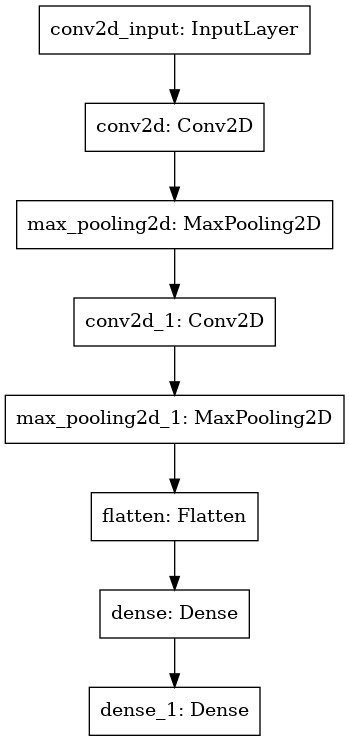

In [7]:
print(model.summary())
tf.keras.utils.plot_model(model)

In [8]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics='accuracy')
path = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=path, histogram_freq=1)

In [9]:
## save image summary for tensorboard
file_writer = tf.summary.create_file_writer(path)
with file_writer.as_default():
  tf.summary.image("Training data", train_images, step=0)

In [10]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2, callbacks=[tensorboard_callback])
model.evaluate(test_images, test_labels)

Epoch 1/10
375/375 [==============================] - 3s 8ms/step - loss: 2.1672 - accuracy: 0.4151 - val_loss: 1.9711 - val_accuracy: 0.6388
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 1.6605 - accuracy: 0.7042 - val_loss: 1.2829 - val_accuracy: 0.7704
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 1.0241 - accuracy: 0.7895 - val_loss: 0.7700 - val_accuracy: 0.8326
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.6791 - accuracy: 0.8343 - val_loss: 0.5490 - val_accuracy: 0.8633
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 0.5216 - accuracy: 0.8648 - val_loss: 0.4380 - val_accuracy: 0.8868
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.4349 - accuracy: 0.8841 - val_loss: 0.3742 - val_accuracy: 0.9007
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.3799 - accuracy: 0.8959 - val_loss: 0.3325 - val_accuracy: 0.9097
Epoch 

[0.26063573360443115, 0.9254000186920166]

In [18]:
# get weights
[len(x) for x in model.layers[2].get_weights()]

[3, 64]